<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/Probabilities_in_Binomial_and_Normal_distributions_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [30]:
# Install
install.packages("openintro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
# Load
library(devtools)
library(dplyr)
library(ggplot2)
library(openintro)
library(broom)

# Uniform distribution

In [32]:
# Set random seed to 334
set.seed(334)

samples = data.frame(a = seq(1,1000,1))


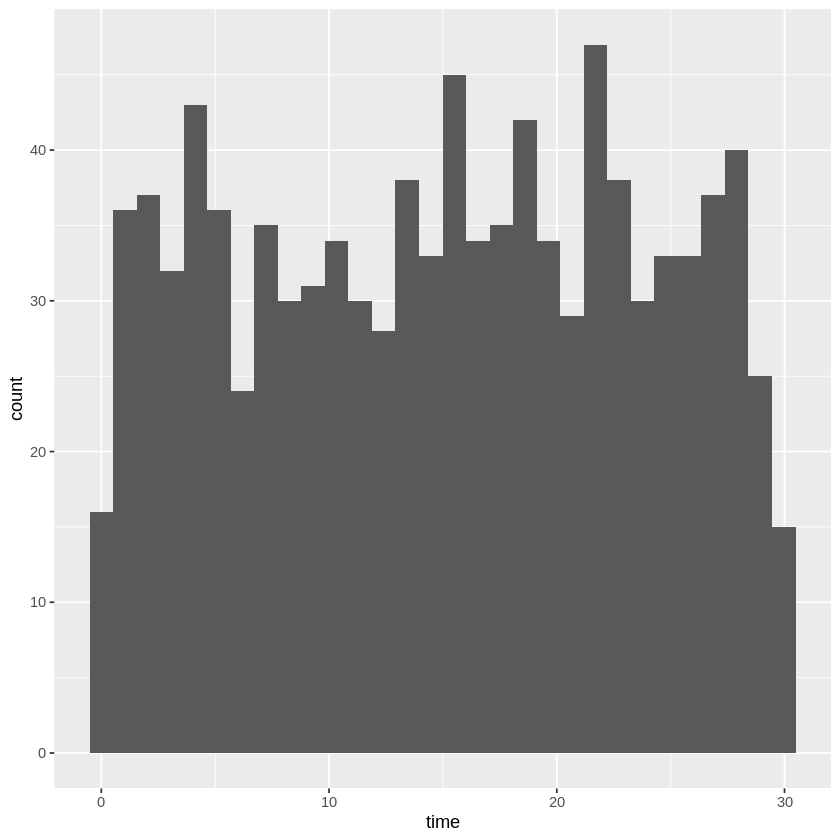

In [33]:
# Generate 1000 wait times between 0 and 30 mins, save in time column
samples = samples %>%
  mutate(time = runif(1000, min = 0, max = 30))

# Create a histogram of simulated times
ggplot(samples, aes(time)) +
  geom_histogram(bins = 30)

# Binomial distribution

Binomial, 

n: number of trials

p: prob of success

In [45]:
# 8 Flips, one coin, 50% of the time
rbinom(8,1,0.5)

# 10 experiments, 3 n, 0.25 prob of occur
data.frame(exp = rbinom(10,3,0.25)) %>%
  count(exp) %>%
  mutate(prob = n / sum(n))

[1] 0 1 1 0 0 1 0 0

,exp,n,prob
,<int>,<int>,<dbl>
1,0,2,0.2
2,1,7,0.7
3,2,1,0.1


For the last experiment take the probability of having 2 succesess.

In [48]:
# Probability of having 2 succesess
dbinom(2,3,0.25)

# Probability of having MORE than 2 succesess
pbinom(2,3,0.25, lower.tail=FALSE)

[1] 0.140625

[1] 0.015625

Expected value is n x p

In [54]:
# Expected value: of 3 n and prob of 0.25
3*0.25


[1] 0.75

## Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [69]:
# Set random seed to 10
set.seed(10)

# Simulate 1000 weeks of 3 deals
deals <- rbinom(10000, 3, 0.3)

# Calculate mean deals won per week
mean(deals)

# The expected deal closed is actually n x p:
3*0.3

[1] 0.9076

[1] 0.9

### What's the probability that Amir closes all 3 deals in a week?

In [72]:
# Probability of closing all 3 deals in a week?
dbinom(3,3,0.30)

[1] 0.027

### What's the probability that Amir closes 1 or fewer deals in a week?

In [75]:
# Probability of having 1 or FEWER deals in a week?
pbinom(1,3,0.30)

[1] 0.784

### What's the probability that Amir closes more than 1 deal?

In [76]:
# Probability of closing > 1 deal out of 3 deals
pbinom(1,3,0.30, lower.tail = F)

[1] 0.216

### Now Amir wants to know how many deals he can expect to close each week if his win rate changes.

In [77]:
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
3*0.3

#Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
3*0.25

#Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.
3*0.35

[1] 0.9

[1] 0.75

[1] 1.05

# Normal Distribution

## Less or higher than value in normal distr

In [81]:
# normal distribution of mean 161 and std of 7 for height of women.
# What percentage is less than 154?
pnorm(154, mean=161, sd=7)

# What percentage is more than 154 cm?
pnorm(154, mean=161, sd=7, lower.tail=F)

# or
1- pnorm(154, mean=161, sd=7)

[1] 0.1586553

[1] 0.8413447

[1] 0.8413447

## What height are 90% of women shorter than?

In [82]:
qnorm(0.9, mean=161, sd=7)

[1] 169.9709

90% of women is shorter than 169,97 cm.

## What heith are 80% of women taller than?

In [83]:
qnorm(0.8, mean=161, sd=7, lower.tail=F)

[1] 155.1087

80% of women are taller than 155.1 cm

## Generate random numbers of a normal distribution

In [84]:
# Ten random number of a normal distribution with 161 and 7 of mean and sd respectively
rnorm(10, mean=161, sd=7)

[1] 168.0808 159.0726 161.9516 167.8087 162.2958 158.2314 160.0522 154.0486
 [9] 156.3334 162.8257

## Simulating with sales deals

### Draw random number of normal dist.

In [88]:
amir = readRDS('/content/Amirsalesdeals.rds')
head(amir)

,product,client,status,amount,num_users
,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17
6,Product B,New,Won,5496.27,2


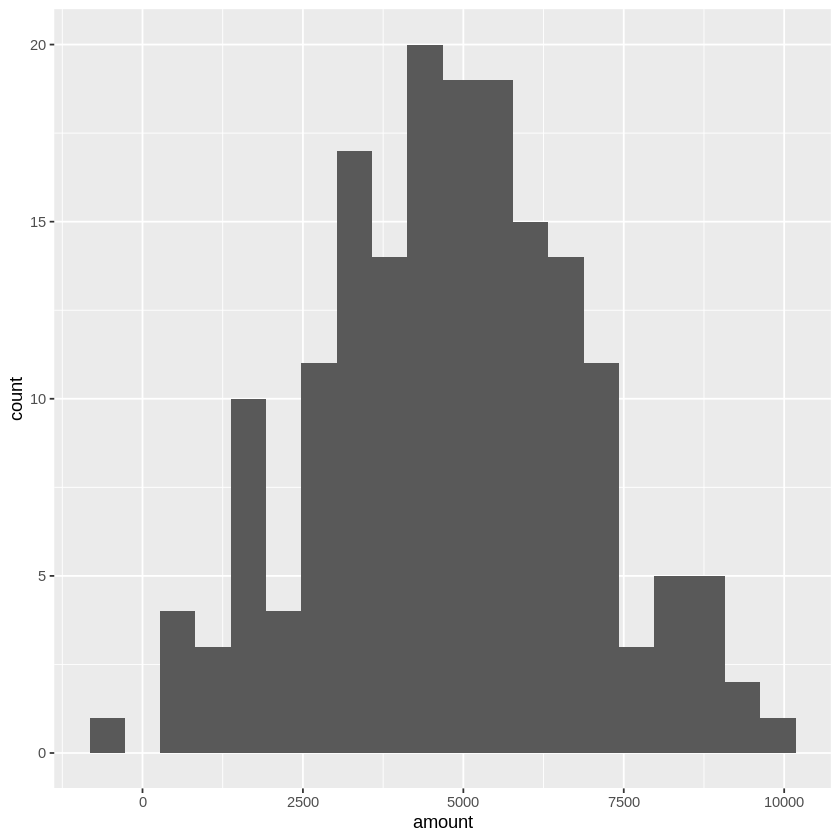

In [92]:
# Plot histogram of amount of sales 
ggplot(amir, aes(amount)) + 
  geom_histogram(bins=20)

### What's the probability of Amir closing a deal worth less than $7500?

In [97]:
mean_amir = mean(amir$amount)
std_amir = sd(amir$amount)

In [98]:
# Proba of closing deal less than $7500
pnorm(7500, mean=mean_amir, sd=std_amir)

[1] 0.9042258

### What's the probability of Amir closing a deal worth more than $1000?

In [102]:
# Proba of closing deal more than $1000
pnorm(1000, mean=mean_amir, sd=std_amir, lower.tail=F)

[1] 0.9679963

### What's the probability of Amir closing a deal worth between $3000 and $7000?

In [104]:
pnorm(7000, mean=mean_amir, sd=std_amir) - pnorm(3000, mean=mean_amir, sd=std_amir)

[1] 0.6668035

### What amount will 75% of Amir's sales be more than?

In [108]:
qnorm(0.75, mean=mean_amir, sd=std_amir, lower.tail=F)

[1] 3423.784

## New simulation with change in sale ticket and volatility.

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%.

In [110]:
# New conditions:
mean_amir_new = mean_amir*1.2
std_amir_new = std_amir*1.3


### What's the probability of Amir closing a deal worth more than $1000?

In [112]:
# Proba of closing deal more than $1000 with new conditions
new = pnorm(1000, mean=mean_amir_new, sd=std_amir_new, lower.tail=F)
new

# Difference with previous
old = pnorm(1000, mean=mean_amir, sd=std_amir, lower.tail=F)

# If positive: Improvement
old - new

[1] 0.9628211

[1] 0.005175177

For this metric, the situation is almost the same as before.